In [1]:
import logging
import pdb
# logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
%run analysis.ipynb
import pyfiglet

In [2]:
repos = ["ErikBrendel/LudumDare"]
# = [
    # "square/okhttp",
    # "jenkinsci/jenkins",
    # "eclipse/che",
    # "elastic/elasticsearch",
    # "apache/camel"
#]

 _____      _ _    ____                     _      _    ___              _ 
| ____|_ __(_) | _| __ ) _ __ ___ _ __   __| | ___| |  / / |   _   _  __| |
|  _| | '__| | |/ /  _ \| '__/ _ \ '_ \ / _` |/ _ \ | / /| |  | | | |/ _` |
| |___| |  | |   <| |_) | | |  __/ | | | (_| |  __/ |/ / | |__| |_| | (_| |
|_____|_|  |_|_|\_\____/|_|  \___|_| |_|\__,_|\___|_/_/  |_____\__,_|\__,_|
                                                                           
                 ____                 
 _   _ _ __ ___ |  _ \  __ _ _ __ ___ 
| | | | '_ ` _ \| | | |/ _` | '__/ _ \
| |_| | | | | | | |_| | (_| | | |  __/
 \__,_|_| |_| |_|____/ \__,_|_|  \___|
                                      

updating ErikBrendel/LudumDare...
Repo is up to date!
Using precalculated structural values

Results from the structural view:

WeightGraph statistics: 128 nodes, 163 edges, 2 connected component(s), with sizes: [120, 8]
Edge weights: [1, 1, 1, 1, 1] ... [1, 2, 2, 2, 2] , mean: 1.0245398773006136


Using pre


Amount of disagreements: 20976


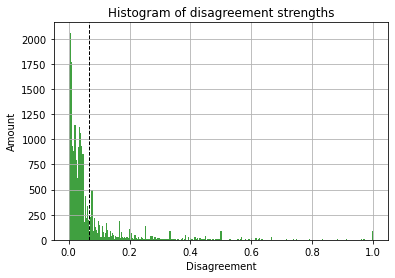

Strong nontrivial disagreements: 275
logic/Player.java/Player/getBounding <> util/geometry/Bounding.java/Bounding  -  0.9902120552777284
logic/Player.java/Player/getBounding <> util/geometry/Bounding.java  -  0.9902120552777284
particles/Smoke.java/Smoke/move <> util/geometry/Point.java  -  0.9788019375772846
particles/Smoke.java/Smoke/move <> util/geometry/Point.java/Point  -  0.9788019375772846
particles/ParticleManager.java/ParticleManager/addEmitter <> particles/ParticleEmitter.java  -  0.9776876267748479
logic/Layer.java/Layer/asteroids <> logic/FlyingObject.java  -  0.9715099715099715
util/menu/MainMenu.java/MainMenu <> util/menu/Button.java  -  0.9708521478447947
util/menu/MainMenu.java/MainMenu <> util/menu/Button.java/Button  -  0.9708521478447947
util/menu/MainMenu.java/MainMenu/options <> util/menu/Button.java  -  0.970100990565037
util/menu/MainMenu.java/MainMenu/start <> util/menu/Button.java  -  0.970100990565037

Program is over!


In [3]:
views = ["structural", "evolutionary"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    # tree = RepoTree.init_from_repo(r)
    # print(r.get_tree())
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        coupling_graph.plaintext_save(repo)
        # coupling_graph.html_save(repo)
        
        
        #print("Most linked nodes:")
        #debug_list = sorted(list(coupling_graph.g.edges.data()), key = lambda e: -e[2]["weight"])
        #print([str(info["weight"]) + ": " + a + " <> " + b for a, b, info in debug_list[0:10]])

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        # coupling_graph.show_weight_histogram()
        # coupling_graph.visualize(use_spring = False, with_labels = True)
        print("\n")
        
    analyze_disagreements([MetricManager.get(r, view) for view in views])
    
print("\nProgram is over!")